# Clasificadores de texto 
### Bogdan Kaleb García Rivera
### MIA-2 

El siguiente proyecto tiene como finalidad la aplicación de técnicas para poder usar algoritmos de aprendizaje automático con procesamiento de texto, a través de conteos que pudiesen ser reelevantes tal como palabras capitalizadas, número de signos de puntuación, etc, así como la comparación de técnicas más avanzadas para el mismo principio. Los datos utilizados provienen directamente de un dataset donde tiene aproximadamente 50,000 reviews de peliculas, las cuales se clasifican únicamente en reseña "positiva" o "negativa" dependiendo del caso. 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

c:\Users\bugy1\anaconda3\envs\music-scraper\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\bugy1\.cache\kagglehub\datasets\lakshmi25npathi\imdb-dataset-of-50k-movie-reviews\versions\1


Lectura del archivo: 

In [3]:
import pandas as pd 
# Load the dataset
df = pd.read_csv(path + "/IMDB Dataset.csv")
print(df.head())
print("\nTamaño del dataset:", df.shape)
print("Columnas del dataset:", df.columns.tolist())
print("Tipo de dato del dataset:\n", df.dtypes)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Tamaño del dataset: (50000, 2)
Columnas del dataset: ['review', 'sentiment']
Tipo de dato del dataset:
 review       object
sentiment    object
dtype: object


### Limpieza de los datos
Inicialmente se debe realizar la limpieza del texto

In [4]:
import re
# remover etiquetas de HTML
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

# Remover urls 
def remove_urls(text):
    pattern = re.compile(r'https?:\/\/.*?[\s+]')
    return pattern.sub(r'',text)

def remove_special_characters(text):
    pattern = re.compile(r'[^a-zA-Z0-9\s]')
    return pattern.sub(r'', text)



df_cleaned = df.copy()
df_cleaned.review = df_cleaned.review.apply(remove_html_tags)
df_cleaned.review = df_cleaned.review.apply(remove_urls)
df_cleaned.review = df_cleaned.review.apply(remove_special_characters)


df_cleaned.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


### Conteos 
Para este proyecto se han considerado los siguientes conteos: 
* Número total de palabras
* Número de palabras únicas
* Número de caracteres
* Número de palabras que empiezan con mayúscula
* Número de palabras en mayúsculas completas
* Número de signos de puntuación
* Número de palabras positivas/negativas
* Frecuencia de stopwords

En este caso se hace uso de diversas librerías

In [5]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords, opinion_lexicon
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('opinion_lexicon')

# Stopwords y lexicons
stop_words = set(stopwords.words('english'))
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())
punctuation_set = set(string.punctuation)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bugy1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bugy1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\bugy1\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [6]:
# total de palabras
def count_total_words(text):
    words = word_tokenize(text)
    return len(words)

# palabras únicas
def count_unique_words(text):
    words = word_tokenize(text)
    return len(set(words))

# caracteres (sin espacios)
def count_characters(text):
    return len(text.replace(" ", ""))

# palabras que empiezan con mayúscula
def count_capitalized_words(text):
    words = word_tokenize(text)
    return sum(1 for word in words if word[0].isupper())

# palabras completamente en mayúsculas
def count_uppercase_words(text):
    words = word_tokenize(text)
    return sum(1 for word in words if word.isupper())

# signos de puntuación
def count_punctuation(text):
    return sum(1 for char in text if char in punctuation_set)

# palabras positivas
def count_positive_words(text):
    words = word_tokenize(text.lower())
    return sum(1 for word in words if word in positive_words)

#  palabras negativas
def count_negative_words(text):
    words = word_tokenize(text.lower())
    return sum(1 for word in words if word in negative_words)

# frecuencia de stopwords
def count_stopwords(text):
    words = word_tokenize(text.lower())
    return sum(1 for word in words if word in stop_words)

df_cleaned['total_words'] = df_cleaned.review.apply(count_total_words)
df_cleaned['unique_words'] = df_cleaned.review.apply(count_unique_words)
df_cleaned['characters'] = df_cleaned.review.apply(count_characters)
df_cleaned['capitalized_words'] = df_cleaned.review.apply(count_capitalized_words)
df_cleaned['uppercase_words'] = df_cleaned.review.apply(count_uppercase_words)
df_cleaned['punctuation'] = df_cleaned.review.apply(count_punctuation)
df_cleaned['positive_words'] = df_cleaned.review.apply(count_positive_words)
df_cleaned['negative_words'] = df_cleaned.review.apply(count_negative_words)
df_cleaned['stopwords'] = df_cleaned.review.apply(count_stopwords)
df_cleaned.head()


,review,sentiment,total_words,unique_words,characters,capitalized_words,uppercase_words,punctuation,positive_words,negative_words,stopwords
0,One of the other reviewers has mentioned that ...,positive,301,198,1365,35,7,0,11,18,133
1,A wonderful little production The filming tech...,positive,156,109,781,13,2,0,11,1,72
2,I thought this was a wonderful way to spend ti...,positive,162,118,713,21,3,0,11,6,76
3,Basically theres a family where a little boy J...,negative,129,86,557,13,2,0,2,6,62
4,Petter Matteis Love in the Time of Money is a ...,positive,222,146,1016,31,1,0,15,2,97


Guardado y lectura del nuevo dataframe

In [7]:
df_cleaned.to_csv("imdb_dataset_cleaned.csv", index=False)

In [1]:
import pandas as pd
df_cleaned = pd.read_csv("imdb_dataset_cleaned.csv")
df_cleaned.head()

,review,sentiment,total_words,unique_words,characters,capitalized_words,uppercase_words,punctuation,positive_words,negative_words,stopwords
0,One of the other reviewers has mentioned that ...,positive,301,198,1365,35,7,0,11,18,133
1,A wonderful little production The filming tech...,positive,156,109,781,13,2,0,11,1,72
2,I thought this was a wonderful way to spend ti...,positive,162,118,713,21,3,0,11,6,76
3,Basically theres a family where a little boy J...,negative,129,86,557,13,2,0,2,6,62
4,Petter Matteis Love in the Time of Money is a ...,positive,222,146,1016,31,1,0,15,2,97


Para este caso se harán uso de 3 algoritmos de machine learning: KNN, Clasificación de Naive Bayes y árboles de decisión. 

Inicialmente se deben elegir las mejores características, por lo que se hará uso de un bosque aleatorio para decidir cuales son las mejores características para los clasificadores. 

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Características únicamente numéricas
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Características a utilizar:", numeric_features)

X = df_cleaned[numeric_features]
y = df_cleaned['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Conversión a binario: 1 para positivo, 0 para negativo

df_numeric = df_cleaned[numeric_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Características a utilizar: ['total_words', 'unique_words', 'characters', 'capitalized_words', 'uppercase_words', 'punctuation', 'positive_words', 'negative_words', 'stopwords']
Tamaño del conjunto de entrenamiento: 35000
Tamaño del conjunto de prueba: 15000


Bosque aleatorio para la elección de características

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy_before = rf.score(X_test, y_test)
print(f'Precisión antes de la selección de características: {accuracy_before:.2f}')

Precisión antes de la selección de características: 0.74


In [4]:
# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
7     negative_words    0.190577
6     positive_words    0.153482
2         characters    0.137473
0        total_words    0.115643
1       unique_words    0.115426
8          stopwords    0.109263
3  capitalized_words    0.106642
4    uppercase_words    0.071495
5        punctuation    0.000000


Para este caso se realizará la clasificación con todas las características y posteriormente con únicamente 3 características para evaluar el desempeño. 

### Todas las características

Librerías y datos necesarios

In [5]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)

target_names = ['Negative', 'Positive'] 

#### Algoritmo KNN 

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Resultados del clasificador KNN:\n")
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Resultados del clasificador KNN:

              precision    recall  f1-score   support

    Negative       0.65      0.68      0.66      7411
    Positive       0.67      0.65      0.66      7589

    accuracy                           0.66     15000
   macro avg       0.66      0.66      0.66     15000
weighted avg       0.66      0.66      0.66     15000



Matriz de confusión

Text(0.5, 1.0, 'Matriz de Confusión del clasificador KNN')

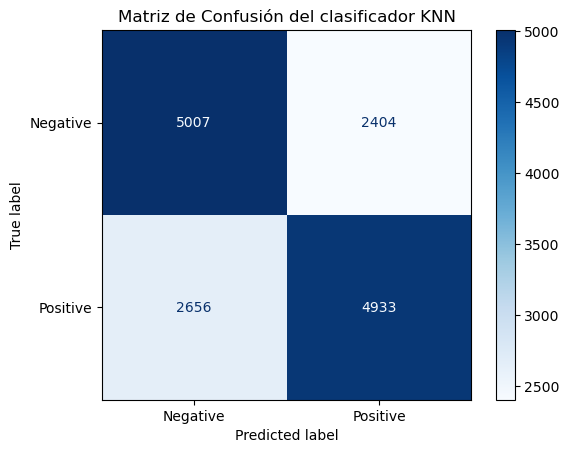

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión del clasificador KNN')

Para KNN se probaron distintos valores de n_neighbors el cual es el número de vecinos por muestra. El que mejor resultado dio fue con un valor de 9 vecinos cercanos con un aproximado de 66% en la precisión.

#### Clasificación Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB


model_NB = GaussianNB()

model_NB.fit(X_train, y_train)

y_pred_nb = model_NB.predict(X_test)
print('Resultados del clasificador Naive Bayes: \n')
print(classification_report(y_test, y_pred_nb, target_names=target_names))

Resultados del clasificador Naive Bayes: 

              precision    recall  f1-score   support

    Negative       0.54      0.88      0.67      7411
    Positive       0.71      0.28      0.40      7589

    accuracy                           0.58     15000
   macro avg       0.62      0.58      0.53     15000
weighted avg       0.63      0.58      0.53     15000



Matriz de confusión

Text(0.5, 1.0, 'Matriz de Confusión del clasificador Naive Bayes')

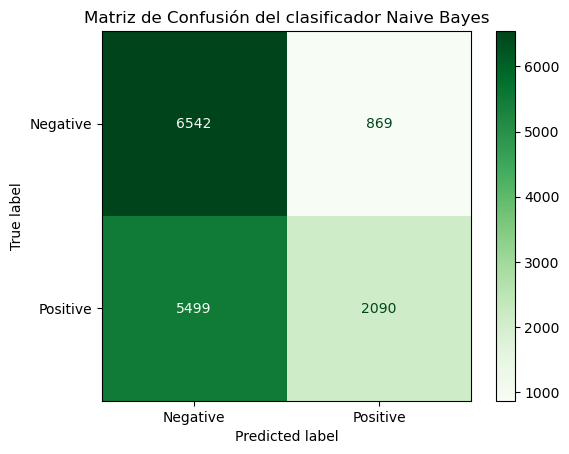

In [9]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb_display = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=target_names)
cm_nb_display.plot(cmap=plt.cm.Greens)
plt.title('Matriz de Confusión del clasificador Naive Bayes')

Recordando que Naive Bayes asume que cada una de las características existe la independencia, se obtuvo una precisión promedio de 62%, aproximadamente lo mismo que haber usado KNN. Para este caso, este modelo tiende a detectar casos negativos, por lo que es bueno detectando los mismos pero le cuesta identificar correctamente los casos positivos. 

### Clasificación decision tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_dt = tree_model.predict(X_test)
print("Resultados del árbol de decisión:\n")
print(classification_report(y_test, y_pred_dt, target_names=target_names))



Resultados del árbol de decisión:

              precision    recall  f1-score   support

    Negative       0.64      0.85      0.73      7411
    Positive       0.78      0.53      0.63      7589

    accuracy                           0.69     15000
   macro avg       0.71      0.69      0.68     15000
weighted avg       0.71      0.69      0.68     15000



Matríz de confusión

Text(0.5, 1.0, 'Matriz de Confusión del clasificador Decision Tree')

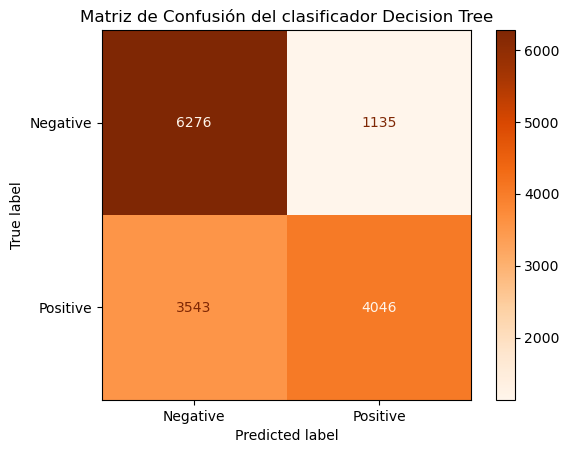

In [11]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=target_names)
cm_dt_display.plot(cmap=plt.cm.Oranges)
plt.title('Matriz de Confusión del clasificador Decision Tree')

Este clasificador, de acuerdo a la precisión de recall, se tiene un sesgo hacia las reseñas negativas. Para el caso de la clase positiva, se tiene una mejor precisión pero con un recall bajo.

### Para 3 características

In [12]:
top_features = feature_importance_df['Feature'][:3].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

#### Algoritmo KNN 

In [13]:
knn_3 = KNeighborsClassifier(n_neighbors=9)
knn_3.fit(X_train_selected, y_train)
y_pred_knn_3 = knn_3.predict(X_test_selected)
print("Resultados del clasificador KNN con 3 características:\n")
print(classification_report(y_test, y_pred_knn_3, target_names=target_names))

Resultados del clasificador KNN con 3 características:

              precision    recall  f1-score   support

    Negative       0.69      0.72      0.70      7411
    Positive       0.71      0.69      0.70      7589

    accuracy                           0.70     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.70      0.70      0.70     15000



Matríz de confusión

Text(0.5, 1.0, 'Matriz de Confusión del clasificador KNN (3 características)')

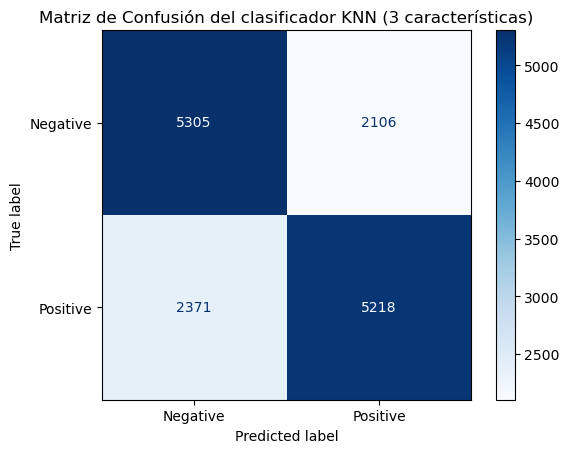

In [14]:
cm_3 = confusion_matrix(y_test, y_pred_knn_3)
cm_display_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=target_names)
cm_display_3.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión del clasificador KNN (3 características)')

#### Clasificación Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB


model_NB_3 = GaussianNB()
model_NB_3.fit(X_train_selected, y_train)
y_pred_nb_3 = model_NB_3.predict(X_test_selected)
print("Resultados del clasificador Naive Bayes con 3 características:\n")
print(classification_report(y_test, y_pred_nb_3, target_names=target_names))

Resultados del clasificador Naive Bayes con 3 características:

              precision    recall  f1-score   support

    Negative       0.59      0.88      0.70      7411
    Positive       0.77      0.39      0.52      7589

    accuracy                           0.63     15000
   macro avg       0.68      0.64      0.61     15000
weighted avg       0.68      0.63      0.61     15000



Matriz de confusión

Text(0.5, 1.0, 'Matriz de Confusión del clasificador Naive Bayes (3 características)')

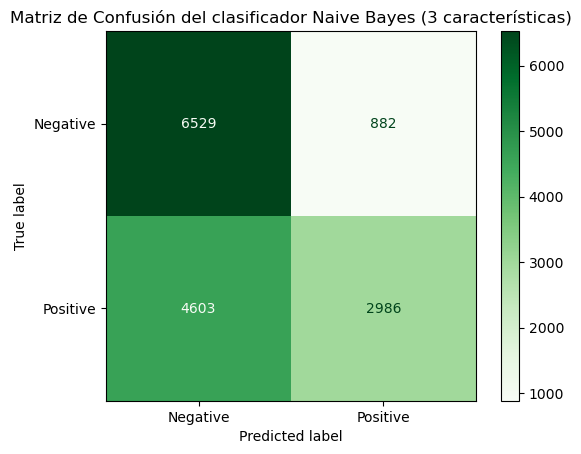

In [16]:
cm_nb_3 = confusion_matrix(y_test, y_pred_nb_3)
cm_nb_display_3 = ConfusionMatrixDisplay(confusion_matrix=cm_nb_3, display_labels=target_names)
cm_nb_display_3.plot(cmap=plt.cm.Greens)
plt.title('Matriz de Confusión del clasificador Naive Bayes (3 características)') 

#### Clasificación decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_model_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model_3.fit(X_train_selected, y_train)

y_pred_dt_3 = tree_model_3.predict(X_test_selected)
print("Resultados del árbol de decisión con 3 características:\n")
print(classification_report(y_test, y_pred_dt_3, target_names=target_names))



Resultados del árbol de decisión con 3 características:



              precision    recall  f1-score   support

    Negative       0.64      0.85      0.73      7411
    Positive       0.78      0.53      0.63      7589

    accuracy                           0.69     15000
   macro avg       0.71      0.69      0.68     15000
weighted avg       0.71      0.69      0.68     15000



Matriz de confusión

Text(0.5, 1.0, 'Matriz de Confusión del clasificador Decision Tree (3 características)')

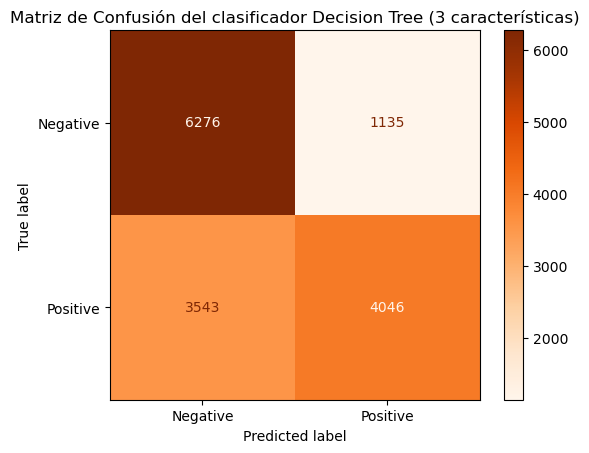

In [18]:
cm_dt_3 = confusion_matrix(y_test, y_pred_dt_3)
cm_dt_display_3 = ConfusionMatrixDisplay(confusion_matrix=cm_dt_3, display_labels=target_names)
cm_dt_display_3.plot(cmap=plt.cm.Oranges)
plt.title('Matriz de Confusión del clasificador Decision Tree (3 características)')

De igual manera se pueden implementar otras técnicas para la clasificación, tal como es la bolsa de palabras y por tfidf.

### Bolsa de palabras (BOW)
Es un modelo simple que permite representar un texto como un conjunto de palabras la cual ignora la gramática y el órden de las palabras, manteniendo la frecuencia de cada una de ellas. 

Creación de la bolsa de palabras

Se realizaron diversas pruebas con unigramas, bigramas y trigramas, por lo que se decidió usar los bigramas debido a que tienen mejor rendimiento. 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') #Bigramas
X_bow = vectorizer.fit_transform(df_cleaned['review']) 

Separación del conjunto de entrenamiento y prueba 

In [20]:
from sklearn.model_selection import train_test_split
y = df_cleaned['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Conversión a binario: 1 para positivo, 0 para negativo
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state=42, stratify=y)

Entrenamiento y prueba de los 3 modelos

In [21]:
from sklearn.naive_bayes import MultinomialNB

# KNN
knn_bow = KNeighborsClassifier(n_neighbors=5)
knn_bow.fit(X_train, y_train)
y_pred_knn_bow = knn_bow.predict(X_test)
print("KNN con Bag of Words:\n", classification_report(y_test, y_pred_knn_bow))

# Naive Bayes
nb_bow = MultinomialNB()
nb_bow.fit(X_train, y_train)
y_pred_nb_bow = nb_bow.predict(X_test)
print("Naive Bayes con Bag of Words:\n", classification_report(y_test, y_pred_nb_bow))

# Árbol de decisión
dt_bow = DecisionTreeClassifier(random_state=42)
dt_bow.fit(X_train, y_train)
y_pred_dt_bow = dt_bow.predict(X_test)
print("Árbol de Decisión con Bag of Words:\n", classification_report(y_test, y_pred_dt_bow))


KNN con Bag of Words:
               precision    recall  f1-score   support

           0       0.52      0.69      0.59      7500
           1       0.54      0.36      0.43      7500

    accuracy                           0.52     15000
   macro avg       0.53      0.52      0.51     15000
weighted avg       0.53      0.52      0.51     15000

Naive Bayes con Bag of Words:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      7500
           1       0.89      0.86      0.87      7500

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000

Árbol de Decisión con Bag of Words:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      7500
           1       0.74      0.74      0.74      7500

    accuracy                           0.74     15000
   macro avg       0.74      0.74    

Matrices de confusión

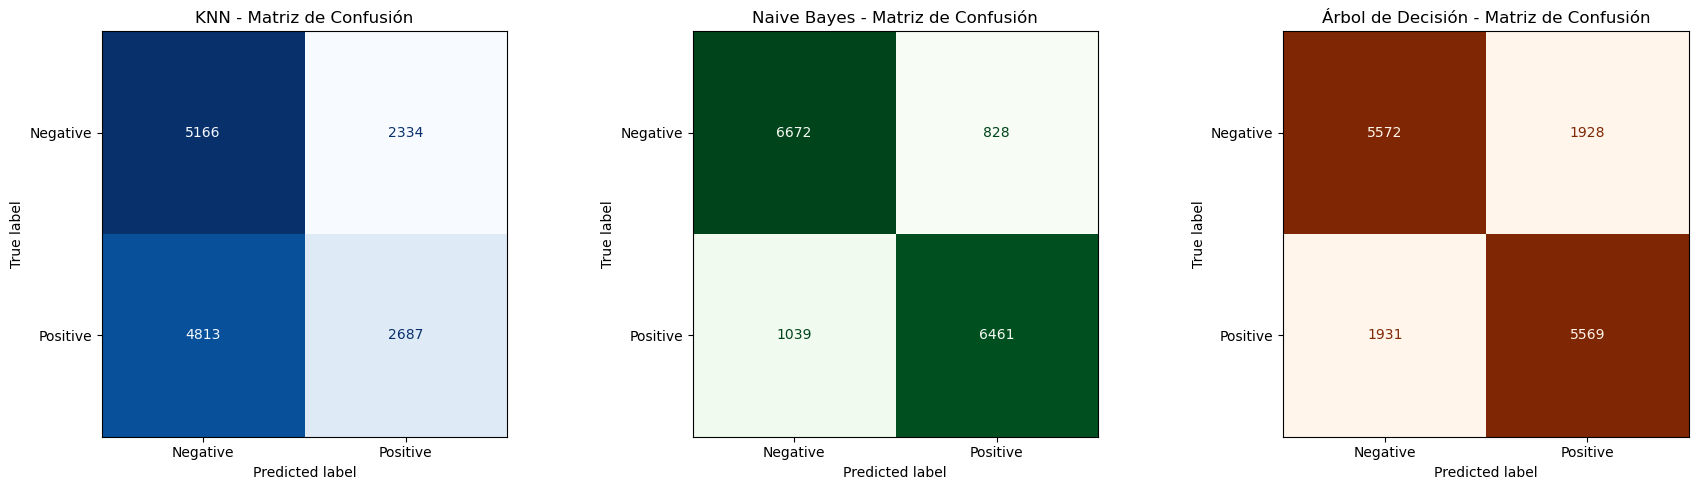

In [22]:
cm_knn = confusion_matrix(y_test, y_pred_knn_bow)
cm_nb = confusion_matrix(y_test, y_pred_nb_bow)
cm_dt = confusion_matrix(y_test, y_pred_dt_bow)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KNN
cm_knn_display = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=target_names)
cm_knn_display.plot(ax=axes[0], cmap=plt.cm.Blues, colorbar=False)
axes[0].set_title('KNN - Matriz de Confusión')

# Naive Bayes
cm_nb_display = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=target_names)
cm_nb_display.plot(ax=axes[1], cmap=plt.cm.Greens, colorbar=False)
axes[1].set_title('Naive Bayes - Matriz de Confusión')

# Árbol de decisión
cm_dt_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=target_names)
cm_dt_display.plot(ax=axes[2], cmap=plt.cm.Oranges, colorbar=False)
axes[2].set_title('Árbol de Decisión - Matriz de Confusión')

plt.tight_layout()
plt.show()

### TF-IDF
Es un método cuantitativo que permite medir qué tan relevante es una palabra dentro de un texto, tomando en cuenta su presencia o ausencia en un conjunto más amplio de documentos. Inicialmente se debe realizar la vectorización con el módulo de TF-IDF. 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['review'])

Separación de los datos 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

Entrenamiento y prueba de los 3 modelos 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# KNN
knn_tfidf = KNeighborsClassifier(n_neighbors=5)
knn_tfidf.fit(X_train, y_train)
y_pred_knn_tfidf = knn_tfidf.predict(X_test)
print("KNN con TF-IDF:\n", classification_report(y_test, y_pred_knn_tfidf))

# Naive Bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test)
print("Naive Bayes con TF-IDF:\n", classification_report(y_test, y_pred_nb_tfidf))

# Árbol de decisión
dt_tfidf = DecisionTreeClassifier(random_state=42)
dt_tfidf.fit(X_train, y_train)
y_pred_dt_tfidf = dt_tfidf.predict(X_test)
print("Árbol de Decisión con TF-IDF:\n", classification_report(y_test, y_pred_dt_tfidf))


KNN con TF-IDF:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75      7500
           1       0.74      0.84      0.78      7500

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000

Naive Bayes con TF-IDF:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      7500
           1       0.87      0.85      0.86      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Árbol de Decisión con TF-IDF:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      7500
           1       0.72      0.71      0.72      7500

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
w

Matrices de confusión 

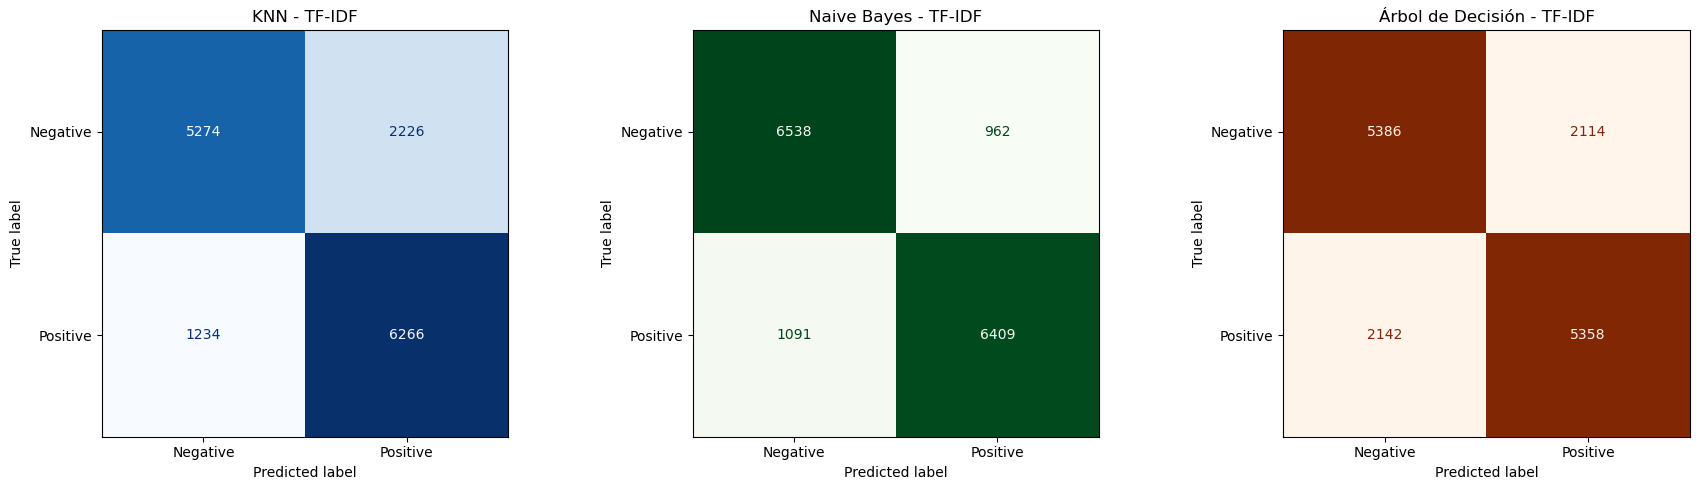

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm_knn_tfidf = confusion_matrix(y_test, y_pred_knn_tfidf)
cm_nb_tfidf = confusion_matrix(y_test, y_pred_nb_tfidf)
cm_dt_tfidf = confusion_matrix(y_test, y_pred_dt_tfidf)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KNN
ConfusionMatrixDisplay(cm_knn_tfidf, display_labels=target_names).plot(
    ax=axes[0], cmap=plt.cm.Blues, colorbar=False)
axes[0].set_title("KNN - TF-IDF")

# Naive Bayes
ConfusionMatrixDisplay(cm_nb_tfidf, display_labels=target_names).plot(
    ax=axes[1], cmap=plt.cm.Greens, colorbar=False)
axes[1].set_title("Naive Bayes - TF-IDF")

# Árbol de Decisión
ConfusionMatrixDisplay(cm_dt_tfidf, display_labels=target_names).plot(
    ax=axes[2], cmap=plt.cm.Oranges, colorbar=False)
axes[2].set_title("Árbol de Decisión - TF-IDF")

plt.tight_layout()
plt.show()


### Discusión 

#### Conteo de palabras
La siguiente tabla muestra una tabla comparativa de los resultados de cada uno de los algoritmos. 

| Modelo                          | Accuracy | Macro F1 | Notas                       |
| ------------------------------- | -------- | -------- | --------------------------- |
| KNN (todas las características)        | 0.66     | 0.66     | Balanceo del desempeño                            |
| Naive Bayes (todas)             | 0.62     | 0.53     | Contiene un desbalanceo entre sus métricas               |
| Árbol de decisión (todas)       | 0.71     | 0.68     | Balanceo del desempeño    |
| KNN (3 características)         | 0.70     | 0.70     | Desempeño aceptable   |
| Naive Bayes (3 características) | 0.68     | 0.61     | Mejora respecto al de todas las características |
| Árbol de decisión (3 caracteristicas)   | 0.71     | 0.68     | Igual al de todas las características           |


De acuerdo a los resultados, el mejor algoritmo de los 3 es el árbol de decisión, esto debido a que tiene un buen balance entre precisión y recall en ambas clases, además de tener un accuracy alto con respecto a los otros algoritmos. Adicional a esto, al realizar una reducción de sus características, no pierde el rendimiento, se mantiene igual, lo que da una pista importante de su capacidad de generalización y robustez. 

Para el caso del algoritmo KNN con 3 características, el accuracy es el mismo, sin embargo se puede observar que en cuanto al algoritmo knn con todas las características, se obtuvo un mejor rendimiento, lo que sugiere que esas 3 características son reelevantes para la clasificación, es decir que el algoritmo puede perder precisión si se tomaran más características para predecir. 

Finalmente el algoritmo de Naive Bayes tiene el rendimiento más bajo en general, tanto con 3 características como con todas, esto se puede deber principalmente a las tendencias de independencia del algoritmo. 

#### Bag of words y TF-IDF
La siguiente tabla muestra los resultados de la aplicación de Bag of words y TF-IDF: 
| Modelo                  | Método | Accuracy | Macro F1 | Notas                              |
|-------------------------|---------------|----------|----------|-------------------------------------|
| KNN                    | Bag of Words  | 0.53     | 0.51     | Bajo desempeño                  |
| Naive Bayes            | Bag of Words  | 0.88     | 0.88     | Excelente desempeño                 |
| Árbol de Decisión      | Bag of Words  | 0.74     | 0.74     | Buen desempeño y balanceado                  |
| KNN                    | TF-IDF        | 0.77     | 0.77     | Muy buena mejora con respecto a Bow    |
| Naive Bayes            | TF-IDF        | 0.86     | 0.86     | Caída ligera frente a Bow, aún sigue siendo alto  |
| Árbol de Decisión      | TF-IDF        | 0.72     | 0.72     | Ligeramente malo que con Bow        |


Se puede notar que el modelo más efectivo en términos generales es Naive Bayes con bolsa de palabras, mostrando una precisión muy similar a la variante que utiliza TF-IDF. Este último también ofrece un alto rendimiento y mantiene un equilibrio respecto a los demás algoritmos. La principal ventaja de este resultado radica en la combinación de simplicidad y eficiencia que caracteriza a Naive Bayes.

De los algoritmos que no fueron tan eficientes para este trabajo fue el algoritmo KNN con bolsa de palabras, el cual no logra generalizar bien todos los casos. 


Se puede notar que el empleo de técnicas más avanzadas, como la bolsa de palabras y TF-IDF, optimiza el desempeño de la mayoría de los algoritmos en comparación con el uso exclusivo de conteos en tareas de procesamiento de lenguaje natural.